# GAMES Consort

## DATA CLEANING & MANIPULATION

#### Student-Instructor: Sam Ayo

### Methodology: Lecture/Practical series

### Dataset Definition

This is an Electricity dataset. This data was collected from the Australian New South Wales Electricity Market. In this market, prices are not fixed and are affected by the market's demand and supply. 
They are set every five minutes. 
Electricity transfers to/from the neighboring state of Victoria.

The dataset contains 45,312 instances dated from 7 May 1996 to 5 December 1998.


* Date: date between 7 May 1996 to 5 December 1998. Here normalized between 0 and 1
* Day: day of the week (1-7)
* Period: time of the measurement (1-48) in half hour intervals over 24 hours. Here normalized between 0 and 1
* NSWprice: New South Wales electricity price, normalized between 0 and 1
* NSWdemand: New South Wales electricity demand, normalized between 0 and 1
* VICprice: Victoria electricity price, normalized between 0 and 1
* VICdemand: Victoria electricity demand, normalized between 0 and 1
* transfer: scheduled electricity transfer between both states, normalized between 0 and 1
* class: identifies the change of the price (UP or DOWN) in New South Wales relative to a moving average of the last 24 hours (and removes the impact of longer term price trends).

#### target: class

#### Dataset Category: Energy

##### Rows: 45,312 # Columns: 8

### Keywords

keywords=["central tendency", "imputation"]


<hr>

## Definition of terms

<b>Data Cleaning</b> is the act of detecting and addressing inconsistencies in a data set or data source.

-  The goal is to find and eliminate discrepancies while preserving the data needed to provide business insights.

- You should also note that data cleansing requires rigorous and ongoing data profiling to identify data quality concerns that may need to be addressed.

<b>Data Manipulation</b> is the process of organizing data to make it readable, organized or structured through different techniques.


<b>importance of Data manipulation</b>
 - Consistent data: Having data in a consistent format allows it to be organised, read and better understood. When you take data from different sources, you may not have a unified view, but with data manipulation and commands, you can make sure that your data is consistently organised and stored.

- Create more value from the data: Overall, being able to transform, edit, delete and insert data into a database means that you can do more with your data. By having information that stays static, it becomes useless. But, when you know how to use data to your benefit, you can have clear insights to make better business decisions.

## WORK FLOW
1. Import libaries and Data
2. Data inspection
3. Data Cleaning
4. data Manipulation

<hr>

### 1. Library import
We will begin by importing all the modules we will need in this notebook.

In [1]:
# scientific computations
import numpy as np
import warnings
warnings.simplefilter(action='ignore')

# data manipulation
import pandas as pd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Parameter definitions

We set all relevant parameters for our notebook. 
By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.



In [2]:
#load dataset
data = pd.read_csv('data/data_practice.csv')
data.head(20)

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,NaN,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN
5,0.0,2,0.106383,0.041161,0.207528,0.003467,NaN,0.414912,DOWN
6,0.0,2,NaN,0.041161,0.171824,0.003467,0.422915,0.414912,DOWN
7,0.0,2,0.148936,0.041161,0.152782,0.003467,0.422915,0.414912,DOWN
8,0.0,2,0.170213,0.041161,0.134930,0.003467,0.422915,0.414912,DOWN
9,0.0,2,0.191489,0.041161,0.140583,0.003467,0.422915,0.414912,DOWN


### 2. Data Inspection

In [3]:
data.shape #check the dimension of the dataset

(45312, 9)

#### 2a. check dataset information

In [4]:
data.columns #check dataset column

Index(['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice',
       'vicdemand', 'transfer', 'class'],
      dtype='object')

In [5]:
data.dtypes #check column types

date         float64
day            int64
period       float64
nswprice     float64
nswdemand    float64
vicprice     float64
vicdemand    float64
transfer      object
class         object
dtype: object

In [6]:
data.info() #check the overall information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  int64  
 2   period     45309 non-null  float64
 3   nswprice   45270 non-null  float64
 4   nswdemand  45268 non-null  float64
 5   vicprice   45278 non-null  float64
 6   vicdemand  45265 non-null  float64
 7   transfer   45287 non-null  object 
 8   class      45289 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
data.describe() #since our data is numerical we get statistical values that best explain it

,date,day,period,nswprice,nswdemand,vicprice,vicdemand
count,45312.000000,45312.000000,45309.000000,45270.000000,45268.000000,45278.000000,45265.000000
mean,0.499080,4.003178,0.500008,0.057855,0.425426,0.003467,0.422915
std,0.340308,1.998695,0.294751,0.039992,0.163332,0.010217,0.121028
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,2.000000,0.255319,0.035105,0.309134,0.002277,0.372087
50%,0.456329,4.000000,0.510638,0.048667,0.443618,0.003467,0.422915
75%,0.880547,6.000000,0.744681,0.074306,0.536001,0.003467,0.469446
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 2b. check dataset value

In [8]:
data[data.duplicated()] #check for average duplicate values in the dataset

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class


In [9]:
 data.nunique(axis=0).sort_values().to_frame() #check for unique values and sort them into frames

,0
class,2
day,7
period,48
date,933
transfer,1879
vicdemand,2846
vicprice,3798
nswprice,4089
nswdemand,5266


In [10]:
#using boolean, check if null values exist in any columns
data.isnull().values.any()

True

In [11]:
data.isnull() #using boolean, check the null value on the dataset

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
45307,False,False,False,False,False,False,False,False,False
45308,False,False,False,False,False,False,False,False,False
45309,False,False,False,False,False,False,False,False,False
45310,False,False,False,False,False,False,False,False,False


In [12]:
data.isna().sum().sort_values().to_frame() #check for missing values and sort them into frames

,0
date,0
day,0
period,3
class,23
transfer,25
vicprice,34
nswprice,42
nswdemand,44
vicdemand,47


#### 2c. distribution of the dataset
##### Histogram


A histogram is the first choice of graph for numerical data because it provides a quick way to get the
big idea about a numerical dataset. A histogram provides a snapshot of all the data broken down into
numerically ordered groups. It is based on binning the variable, that is, dividing it up into discrete
categories. These categories are then ordered from smallest to largest. The height of each bar of a
histogram represents either the frequency (number of individuals in each group) or the relative
frequency (percentage of individuals in each group).


Implementation: (i) Pandas direct plotting (ii) Matplotlib

In [13]:
# encode target values to numeric for histogram visualization
#unique_classes = data['class'].unique().tolist()
hist_data = data
#hist_data['enc_class'] = hist_data['class'].apply(lambda x: unique_classes.index(x) if x in unique_classes else 0)

In [14]:
hist_data

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0000,2,0.021277,0.051699,NaN,0.003467,0.422915,0.414912,UP
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN
...,...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,DOWN
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,DOWN
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP


array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'period'}>],
       [<AxesSubplot:title={'center':'nswprice'}>,
        <AxesSubplot:title={'center':'nswdemand'}>,
        <AxesSubplot:title={'center':'vicprice'}>],
       [<AxesSubplot:title={'center':'vicdemand'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

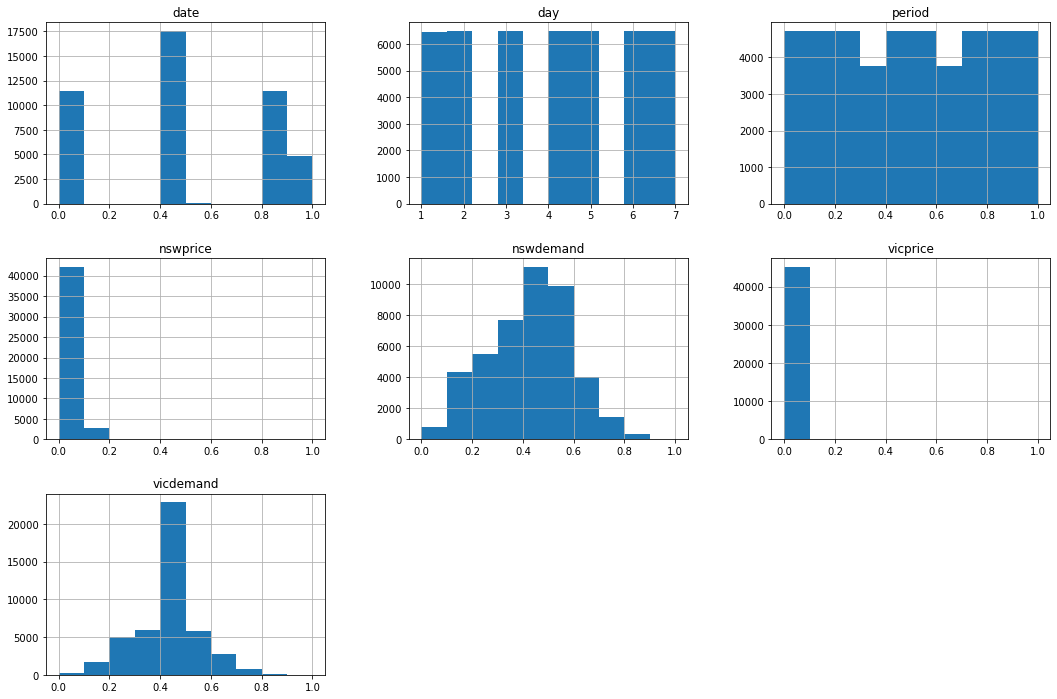

In [15]:
hist_data[['date','day','period','nswprice','nswdemand','vicprice','vicdemand','transfer']].hist(figsize = (18,12))

array([<AxesSubplot:title={'center':'DOWN'}>,
       <AxesSubplot:title={'center':'UP'}>], dtype=object)

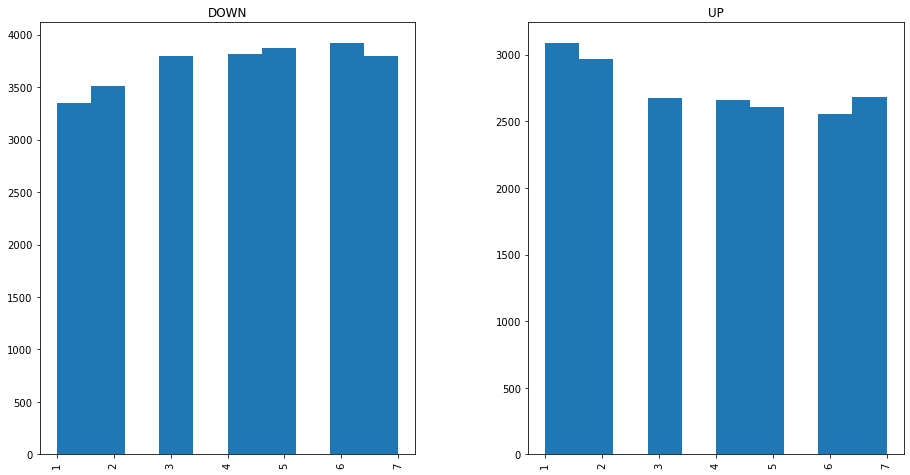

In [16]:
hist_data[['day']].hist(by=hist_data['class'], figsize = (15,8))

array([<AxesSubplot:title={'center':'DOWN'}>,
       <AxesSubplot:title={'center':'UP'}>], dtype=object)

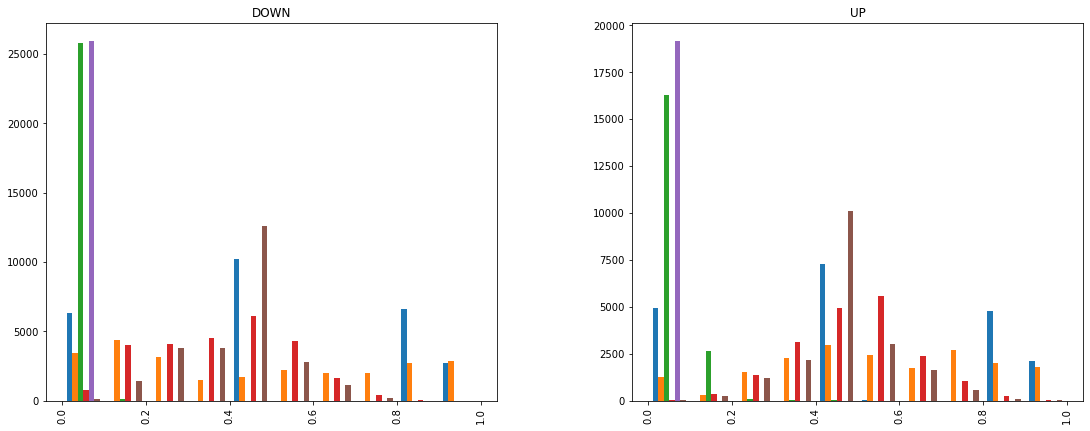

In [17]:
hist_data[['date','period','nswprice','nswdemand','vicprice','vicdemand','transfer']].hist(by=hist_data['class'], figsize = (18,7))

<AxesSubplot:xlabel='class'>

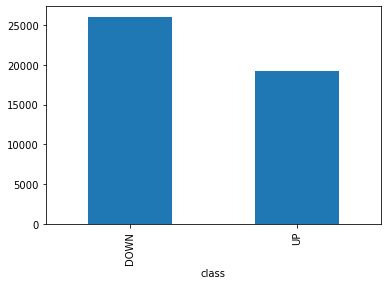

In [18]:
# Counting the occurrences of each unique category
GroupedData=hist_data.groupby(by='class').size()
# Generating a bar chart for class column
GroupedData.plot.bar()

##### Notes on imbalanced data

Collect more data - This might seem like a no brainer, but it is often overlooked. 

Can you write some more queries and extract data from your database? Do you need a few more hours for more customer data? More data can balance your dataset or might make it even more imbalanced. Either way, you want a more complete picture of the data.


Use Tree based models - Tree-based models tend to perform better on imbalanced datasets. Essentially, they build hierarchies based on split/decision points, which might better separate the classes.

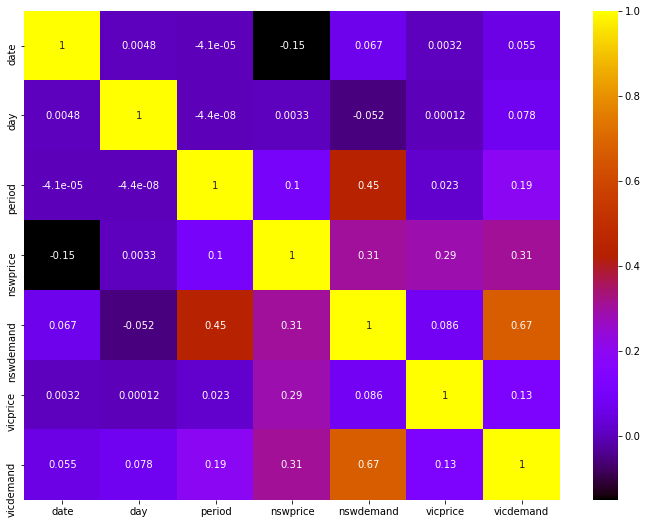

In [19]:
#visualize target variables for relationship
corr = data.corr()
fig, ax = plt.subplots(figsize=(12,9)) 
dataplot = sns.heatmap(corr, cmap="gnuplot", annot=True, ax=ax)
plt.show()

### 3. Data Cleaning

If you're doing very careful data analysis, this is the point at which you'd look at each column individually to figure out the best strategy for filling those missing values. For the rest of this notebook, we'll cover some "quick and dirty" techniques that can help you with missing values but will probably also end up removing some useful information or adding some noise to your data.

1. Drop missing values
2. Fill missing values with 0.0
3. Fill missing values with nearest value on same column
4. Fill missing values with central tendency measures
5. Fill null values using interpolation(linear)

#### 3.1 Drop missing values

In [20]:
#specify the featureset
data_feat = data[['date','day','period','nswprice','nswdemand','vicprice','vicdemand','transfer']]
data_feat

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912
1,0.0000,2,0.021277,0.051699,NaN,0.003467,0.422915,0.414912
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912
...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579


In [21]:
# remove all the rows that contain a missing value
rows_with_na_dropped = data_feat
rows_with_na_dropped=rows_with_na_dropped.dropna()
print("Original number of rows: {}, number of rows after dropping: {}. \n We dropped {} number of records".format(data.shape[0],rows_with_na_dropped.shape[0],(data.shape[0]-rows_with_na_dropped.shape[0])))

Original number of rows: 45312, number of rows after dropping: 45135. 
 We dropped 177 number of records


In [22]:
# remove all columns with at least one missing value
columns_with_na_dropped = data_feat
columns_with_na_dropped = columns_with_na_dropped.dropna(axis=1)
print("Original number of columns: {}, number of columns after dropping: {}. \n We dropped {} number of variables".format(data.shape[1],columns_with_na_dropped.shape[1],(data.shape[1]-columns_with_na_dropped.shape[1])))


Original number of columns: 9, number of columns after dropping: 2. 
 We dropped 7 number of variables


#### 3.2 Fill missing values with 0.0

In [23]:
# replace all NA's with 0
data_with_filled_0 = data_feat
data_with_filled_0 = data_with_filled_0.fillna(0)
data_with_filled_0.isna().sum().sort_values().to_frame()

,0
date,0
day,0
period,0
nswprice,0
nswdemand,0
vicprice,0
vicdemand,0
transfer,0


#### 3.3 Fill missing values with nearest value on same column

In [24]:
# replace all missing values that comes directly after it in the same column(Backward propagation)
data_with_filled_nearest = data_feat
data_with_filled_nearest = data_with_filled_nearest.fillna(method = 'bfill', axis=0)
data_with_filled_nearest.isna().sum().sort_values().to_frame()

,0
date,0
day,0
period,0
nswprice,0
nswdemand,0
vicprice,0
vicdemand,0
transfer,0


#### 3.4 Imputing fill values with statistical measures of central tendency


Assumption:

1. Since the Period variable is a time of the measurement (1-48) in half hour intervals over 24 hours. We can safely clean the dataset by applying values from the most occuring value over the missing values.
2. To balance our class label, we will fill the missing values with the corresponding target.
3. The transfer variable is a scheduled electricity transfer between both states, so it is more appropriate to fill missing values with a mean value of all the values in the dataset.
4. The VICprice : Victoria electricity price is a collected dataset over a population. Hence it becomes a good decision to populate missing values with mean over mode. Since we can not fill missing values with mode however high or low because that will not represent an appropriate distribution or a good sampling technique.
5. NSWprice: New South Wales electricity price is a collected dataset over a population. Hence it becomes a good decision to populate missing values with mean over mode. Since we can not fill missing values with mode however high or low because that will not represent an appropriate distribution or a good sampling technique.
6. NSWdemand: New South Wales electricity demand since the price is moved by demand, we can assume demand on the market is uncontrolled hence we can fill missing values with the most occuring value

##### a. mean

In [25]:
#fill mising values with mean
data_feat['transfer'] = data_feat['transfer'].replace(regex=[r'\D+'], value=np.nan).astype(float) #replace non-numeric values with nan
data_feat['transfer'] = data_feat['transfer'].astype('float64') #convert the column type to float64 for easy cleaning
data_feat["transfer"].fillna(data_feat.mean()['transfer'], inplace=True)
data_feat.isna().sum().sort_values().to_frame()

,0
date,0
day,0
transfer,0
period,3
vicprice,34
nswprice,42
nswdemand,44
vicdemand,47


In [26]:
#fill mising values with mean
data_feat["vicprice"].fillna(data_feat.mean()["vicprice"], inplace=True)
data_feat.isna().sum().sort_values().to_frame()

,0
date,0
day,0
vicprice,0
transfer,0
period,3
nswprice,42
nswdemand,44
vicdemand,47


In [27]:
#fill mising values with mean
data_feat["nswprice"].fillna(data_feat.mean()["nswprice"], inplace=True)
data_feat.isna().sum().sort_values().to_frame()

,0
date,0
day,0
nswprice,0
vicprice,0
transfer,0
period,3
nswdemand,44
vicdemand,47


##### b. median

data_feat.fillna(data_feat.mode()["col_name"], inplace=True)
data_feat.isna().sum().sort_values().to_frame()

##### c. mode

In [28]:
#fill mising values with mode
data_feat["period"].fillna(data_feat.mean()["period"], inplace=True)
data_feat.isna().sum().sort_values().to_frame()

,0
date,0
day,0
period,0
nswprice,0
vicprice,0
transfer,0
nswdemand,44
vicdemand,47


In [29]:
#fill mising values with mode
data_feat["nswdemand"].fillna(data_feat.mean()["nswdemand"], inplace=True)
data_feat.isna().sum().sort_values().to_frame()

,0
date,0
day,0
period,0
nswprice,0
nswdemand,0
vicprice,0
transfer,0
vicdemand,47


In [30]:
#fill mising values with mode
data_feat["vicdemand"].fillna(data_feat.mean()["vicdemand"], inplace=True)
data_feat.isna().sum().sort_values().to_frame()

,0
date,0
day,0
period,0
nswprice,0
nswdemand,0
vicprice,0
vicdemand,0
transfer,0


#### Fill class label with less balanced section

In [31]:
# fill missing values with UP
data['class'].fillna("UP", inplace=True)
data.isna().sum()

date          0
day           0
period        3
nswprice     42
nswdemand    44
vicprice     34
vicdemand    47
transfer     25
class         0
dtype: int64

In [32]:
#lets pop the class column 
classdf = data.pop('class')
classdf.head()

0      UP
1      UP
2      UP
3      UP
4    DOWN
Name: class, dtype: object

##### merge the class and features

In [33]:
New_dataset = pd.concat([pd.DataFrame(classdf), data_feat], axis=1)
New_dataset['class'][len(data_feat):] = New_dataset[New_dataset.columns.values[-1]][len(data_feat):]
#New_dataset.drop(New_dataset.columns.values[-1], axis=1, inplace=True)

New_dataset

,class,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,UP,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.5
1,UP,0.0000,2,0.021277,0.051699,0.425426,0.003467,0.422915,0.5
2,UP,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.5
3,UP,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.5
4,DOWN,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.5
...,...,...,...,...,...,...,...,...,...
45307,DOWN,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.5
45308,DOWN,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.5
45309,DOWN,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.5
45310,UP,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.5


In [34]:
New_dataset.isna().sum().sort_values().to_frame()

,0
class,0
date,0
day,0
period,0
nswprice,0
nswdemand,0
vicprice,0
vicdemand,0
transfer,0


<AxesSubplot:xlabel='class'>

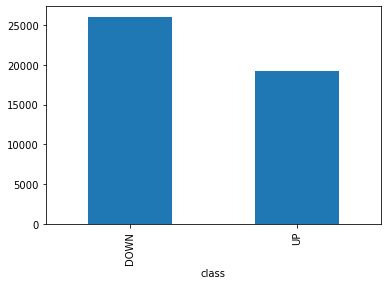

In [35]:
NGroupedData=New_dataset.groupby(by='class').size()
NGroupedData.plot.bar()

### 4. Data Manipulation

1. Check Outliers
2. Manipulating by Rating

##### Tutorial by Sam Ayo


Connect on Linkedin (https://linkedin.com/in/sam-ayo)

# References
List relevant references: